provided a DATASET of ~1.7M records of posts collected from Reddit using Google big query.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MBTI Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import plotly.express as px 

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP_project/MBTI 500.csv")

In [ ]:
data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


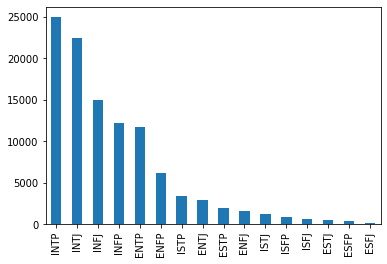

In [ ]:
data['type'].value_counts().plot(kind='bar')

In [ ]:
data['type'].value_counts() # INTP 24961, ESFJ 181 

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [ ]:
data['energy']=data['type'].apply(lambda x:x[0])
data['recognize']=data['type'].apply(lambda x:x[1])
data['judgment']=data['type'].apply(lambda x:x[2])
data['plan']=data['type'].apply(lambda x:x[3])

In [ ]:
data

,posts,type,energy,recognize,judgment,plan
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P
106064,schedule modify hey w intp strong wing underst...,INFP,I,N,F,P
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P


In [ ]:
data['energy'].value_counts() # I : 80677, E : 25390
data['recognize'].value_counts() # N : 96866, S : 9201
data['judgment'].value_counts() # T : 69203, F : 36864
data['plan'].value_counts() # P : 61632, J : 44435

# N or S 의 데이터가 10 대1로 비대칭임
# 그다음순으로 I or E가 3대1로 비대칭

P    61632
J    44435
Name: plan, dtype: int64

In [ ]:
data['voca count']=data['posts'].apply(lambda x:x.split()).apply(lambda x:len(x))

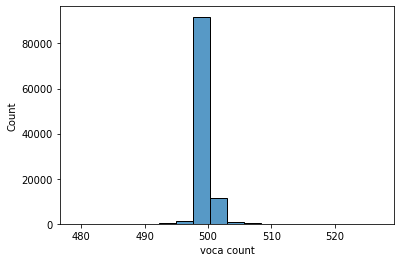

In [ ]:
sns.histplot(data['voca count'])

In [ ]:
data['voca count'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: voca count, dtype: float64

In [ ]:
# 단어들 토큰화
# 불용어 제거

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords # 불용어 제거
from nltk.tokenize import word_tokenize # 단어들 토큰화

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

In [ ]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
def delete_shortword(words):
    return shortword.sub('', words)

In [ ]:
data['posts']=data['posts'].apply(lambda x : delete_shortword(x))

In [ ]:
data['tokenization']=data['posts'].apply(lambda x:word_tokenize(x))

In [ ]:
# 불용어 추가

In [ ]:
stop = stopwords.words('english') # 불용어
# stop.extend(['intj','entj','istj','estj','infj','enfj','isfj','esfj','intp','entp','istp','estp','infp','enfp','isfp','esfp'])
stop.extend(['smv','iii','ouiiiiiiiiiiiiiiiiiiiiiiiiii','liiiiiike','boiiii'])

In [ ]:
data['tokenization'] = data['tokenization'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
def list2str(words):
    return ' '.join(words)

In [ ]:
data['clean posts'] = data['tokenization'].apply(list2str)

In [ ]:
data

,posts,type,energy,recognize,judgment,plan,voca count,tokenization,clean posts
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,501,"[know, intj, tool, use, interaction, people, e...",know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,501,"[rap, music, ehh, opp, yeah, know, valid, well...",rap music ehh opp yeah know valid well know fa...
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,501,"[preferably, low, except, wew, lad, video, min...",preferably low except wew lad video mind good ...
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,501,"[drink, like, wish, could, drink, red, wine, g...",drink like wish could drink red wine give head...
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,501,"[space, program, bad, deal, meing, freelance, ...",space program bad deal meing freelance max see...
...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,499,"[stay, frustrate, world, life, want, take, lon...",stay frustrate world life want take long nap w...
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,499,"[fizzle, around, time, mention, sure, mistake,...",fizzle around time mention sure mistake thing ...
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,499,"[schedule, modify, hey, intp, strong, wing, un...",schedule modify hey intp strong wing understan...
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,499,"[enfj, since, january, busy, schedule, able, s...",enfj since january busy schedule able spend li...


##### NRCLex 활용

In [ ]:
# 마크 M. 베일리(Mark M. Bailey)가 MIT에서 승인한 PyPI 프로젝트로, 주어진 텍스트의 감정과 감정을 예측한다. 
# 이 패키지는 약 27,000개의 단어를 포함하고 있으며 캐나다 국립 연구 위원회(NRC) 영향 어휘와 
# NLTK 라이브러리의  WordNet 동의어 집합을 기반으로 한다.

# 측정된 감정적 영향은 다음을 포함한다.

# fear
# anger
# anticipation
# trust
# surprise
# positive
# negative
# sadness
# disgust
# joy

In [ ]:
pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 4.0 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=1ef7d147d1fa8f7d78fa5c55d50ed03226d2b4932bdba0a6cf83be93594a8ee3
  Stored in directory: /root/.cache/pip/wheels/83/95/c0/42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built NRCLex


In [ ]:
from nrclex import NRCLex

In [ ]:
data['posts emotion'] = data['clean posts'].apply(lambda x : NRCLex(x).raw_emotion_scores)

In [ ]:
data['posts emotion']

0         {'negative': 33, 'anger': 16, 'disgust': 6, 'f...
1         {'joy': 28, 'positive': 63, 'sadness': 15, 'tr...
2         {'anticipation': 24, 'joy': 22, 'positive': 63...
3         {'negative': 29, 'joy': 21, 'positive': 45, 'f...
4         {'anger': 18, 'disgust': 8, 'fear': 15, 'negat...
                                ...                        
106062    {'anger': 13, 'disgust': 4, 'negative': 29, 's...
106063    {'anticipation': 19, 'negative': 35, 'sadness'...
106064    {'surprise': 13, 'anger': 11, 'fear': 17, 'neg...
106065    {'anticipation': 20, 'joy': 19, 'positive': 39...
106066    {'anticipation': 40, 'joy': 33, 'positive': 52...
Name: posts emotion, Length: 106067, dtype: object

In [ ]:
data

,posts,type,energy,recognize,judgment,plan,voca count,tokenization,clean posts,posts emotion
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,501,"[know, intj, tool, use, interaction, people, e...",know intj tool use interaction people excuse a...,"{'negative': 33, 'anger': 16, 'disgust': 6, 'f..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,501,"[rap, music, ehh, opp, yeah, know, valid, well...",rap music ehh opp yeah know valid well know fa...,"{'joy': 28, 'positive': 63, 'sadness': 15, 'tr..."
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,501,"[preferably, low, except, wew, lad, video, min...",preferably low except wew lad video mind good ...,"{'anticipation': 24, 'joy': 22, 'positive': 63..."
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,501,"[drink, like, wish, could, drink, red, wine, g...",drink like wish could drink red wine give head...,"{'negative': 29, 'joy': 21, 'positive': 45, 'f..."
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,501,"[space, program, bad, deal, meing, freelance, ...",space program bad deal meing freelance max see...,"{'anger': 18, 'disgust': 8, 'fear': 15, 'negat..."
...,...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,499,"[stay, frustrate, world, life, want, take, lon...",stay frustrate world life want take long nap w...,"{'anger': 13, 'disgust': 4, 'negative': 29, 's..."
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,499,"[fizzle, around, time, mention, sure, mistake,...",fizzle around time mention sure mistake thing ...,"{'anticipation': 19, 'negative': 35, 'sadness'..."
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,499,"[schedule, modify, hey, intp, strong, wing, un...",schedule modify hey intp strong wing understan...,"{'surprise': 13, 'anger': 11, 'fear': 17, 'neg..."
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,499,"[enfj, since, january, busy, schedule, able, s...",enfj since january busy schedule able spend li...,"{'anticipation': 20, 'joy': 19, 'positive': 39..."


In [ ]:
data.drop(['posts', 'tokenization', 'energy', 'recognize','judgment','plan','voca count'], axis=1, inplace=True)
# 열 정리

In [ ]:
data

,type,clean posts,posts emotion
0,INTJ,know intj tool use interaction people excuse a...,"{'negative': 33, 'anger': 16, 'disgust': 6, 'f..."
1,INTJ,rap music ehh opp yeah know valid well know fa...,"{'joy': 28, 'positive': 63, 'sadness': 15, 'tr..."
2,INTJ,preferably low except wew lad video mind good ...,"{'anticipation': 24, 'joy': 22, 'positive': 63..."
3,INTJ,drink like wish could drink red wine give head...,"{'negative': 29, 'joy': 21, 'positive': 45, 'f..."
4,INTJ,space program bad deal meing freelance max see...,"{'anger': 18, 'disgust': 8, 'fear': 15, 'negat..."
...,...,...,...
106062,INFP,stay frustrate world life want take long nap w...,"{'anger': 13, 'disgust': 4, 'negative': 29, 's..."
106063,INFP,fizzle around time mention sure mistake thing ...,"{'anticipation': 19, 'negative': 35, 'sadness'..."
106064,INFP,schedule modify hey intp strong wing understan...,"{'surprise': 13, 'anger': 11, 'fear': 17, 'neg..."
106065,INFP,enfj since january busy schedule able spend li...,"{'anticipation': 20, 'joy': 19, 'positive': 39..."


In [ ]:
data['posts emotion'][0]

{'negative': 33,
 'anger': 16,
 'disgust': 6,
 'fear': 24,
 'sadness': 15,
 'joy': 17,
 'positive': 61,
 'trust': 45,
 'anticipation': 37,
 'surprise': 17}

In [ ]:
rows=[]
df = data['posts emotion']
for type_MBTI, row in zip(data['type'], df):
    row['type'] = type_MBTI
    rows.append(row)
    
emotion_data = pd.DataFrame(rows)


In [ ]:
emotion_data.isnull().sum()

negative         3
anger            8
disgust         60
fear             4
sadness          3
joy              6
positive         2
trust            3
anticipation     4
surprise         7
type             0
dtype: int64

In [ ]:
# 결측값을 수치 0으로 변경
emotion_data.fillna(0, inplace=True)

In [ ]:
emotion_data

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
0,33.0,16.0,6.0,24.0,15.0,17.0,61.0,45.0,37.0,17.0,INTJ
1,34.0,19.0,15.0,14.0,15.0,28.0,63.0,42.0,33.0,17.0,INTJ
2,32.0,14.0,13.0,15.0,17.0,22.0,63.0,38.0,24.0,23.0,INTJ
3,29.0,12.0,9.0,15.0,13.0,21.0,45.0,19.0,20.0,6.0,INTJ
4,31.0,18.0,8.0,15.0,14.0,20.0,61.0,41.0,30.0,11.0,INTJ
...,...,...,...,...,...,...,...,...,...,...,...
106062,29.0,13.0,4.0,19.0,16.0,21.0,49.0,24.0,29.0,12.0,INFP
106063,35.0,6.0,5.0,15.0,17.0,18.0,52.0,30.0,19.0,5.0,INFP
106064,31.0,11.0,6.0,17.0,15.0,28.0,61.0,25.0,29.0,13.0,INFP
106065,25.0,11.0,10.0,11.0,11.0,19.0,39.0,28.0,20.0,7.0,INFP


In [ ]:
emotion_data.describe()

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise
count,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000,106067.000000
mean,35.336514,15.448122,10.361526,18.333195,16.281530,25.863926,61.289138,36.932646,29.726833,13.698530
std,8.671706,5.622090,4.301713,6.184098,5.531155,7.341771,10.072386,7.741428,6.905994,4.435965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,12.000000,7.000000,14.000000,12.000000,21.000000,54.000000,32.000000,25.000000,11.000000
50%,35.000000,15.000000,10.000000,18.000000,16.000000,25.000000,61.000000,37.000000,29.000000,13.000000
75%,41.000000,19.000000,13.000000,22.000000,20.000000,30.000000,68.000000,42.000000,34.000000,16.000000
max,124.000000,84.000000,60.000000,113.000000,62.000000,93.000000,142.000000,118.000000,88.000000,90.000000


In [ ]:
sample_check = 'intj, entj, istj, estj, infj, enfj, isfj, esfj, intp, entp, istp, estp, infp, enfp, isfp, esfp'
NRCLex(sample_check).raw_emotion_scores # 감정 없음

{}

Kmeans 클러스터링 및 PCA 시각화

In [ ]:
emotion_mat=emotion_data.copy()

In [ ]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=16))])
X = emotion_mat.select_dtypes(np.number)
cluster_pipeline.fit(X)
emotion_mat['cluster'] = cluster_pipeline.predict(X)

In [ ]:
emotion_mat

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type,cluster
0,33.0,16.0,6.0,24.0,15.0,17.0,61.0,45.0,37.0,17.0,INTJ,2
1,34.0,19.0,15.0,14.0,15.0,28.0,63.0,42.0,33.0,17.0,INTJ,1
2,32.0,14.0,13.0,15.0,17.0,22.0,63.0,38.0,24.0,23.0,INTJ,1
3,29.0,12.0,9.0,15.0,13.0,21.0,45.0,19.0,20.0,6.0,INTJ,14
4,31.0,18.0,8.0,15.0,14.0,20.0,61.0,41.0,30.0,11.0,INTJ,9
...,...,...,...,...,...,...,...,...,...,...,...,...
106062,29.0,13.0,4.0,19.0,16.0,21.0,49.0,24.0,29.0,12.0,INFP,7
106063,35.0,6.0,5.0,15.0,17.0,18.0,52.0,30.0,19.0,5.0,INFP,14
106064,31.0,11.0,6.0,17.0,15.0,28.0,61.0,25.0,29.0,13.0,INFP,7
106065,25.0,11.0,10.0,11.0,11.0,19.0,39.0,28.0,20.0,7.0,INFP,14


In [ ]:
# Visualizing the Clusters with PCA
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
emotion_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=emotion_embedding)
projection['MBTI type'] = emotion_mat['type']
projection['cluster'] = emotion_mat['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'MBTI type'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualizing the Clusters with PCA
fig = px.scatter(
    projection, x='x', y='y', color='MBTI type', hover_data=['x', 'y', 'MBTI type'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

각 MBTI 별 대표하는 벡터값 찾기

In [ ]:
emotion_data

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
0,33.0,16.0,6.0,24.0,15.0,17.0,61.0,45.0,37.0,17.0,INTJ
1,34.0,19.0,15.0,14.0,15.0,28.0,63.0,42.0,33.0,17.0,INTJ
2,32.0,14.0,13.0,15.0,17.0,22.0,63.0,38.0,24.0,23.0,INTJ
3,29.0,12.0,9.0,15.0,13.0,21.0,45.0,19.0,20.0,6.0,INTJ
4,31.0,18.0,8.0,15.0,14.0,20.0,61.0,41.0,30.0,11.0,INTJ
...,...,...,...,...,...,...,...,...,...,...,...
106062,29.0,13.0,4.0,19.0,16.0,21.0,49.0,24.0,29.0,12.0,INFP
106063,35.0,6.0,5.0,15.0,17.0,18.0,52.0,30.0,19.0,5.0,INFP
106064,31.0,11.0,6.0,17.0,15.0,28.0,61.0,25.0,29.0,13.0,INFP
106065,25.0,11.0,10.0,11.0,11.0,19.0,39.0,28.0,20.0,7.0,INFP


In [ ]:
types_MBTI = emotion_data['type'].unique()

In [ ]:
# Euclidean distance
def eucl_dist(data1, data2):
    res_val = np.sqrt( sum( (data2-data1)**2 ) )
    return res_val

In [ ]:
center_idx = []
for i in types_MBTI:
  temp_df = emotion_data[emotion_data['type'] == i].iloc[:,:-1]
  temp_df.loc[-1] = np.array(temp_df.mean())

  eucl_val = []
  for i in range(len(temp_df)-1):
   eucl_val.append( eucl_dist(temp_df.loc[-1],temp_df.iloc[i]) )

  min_idx=eucl_val.index(min(eucl_val))
  center_idx.append(temp_df.iloc[min_idx].name)

In [ ]:
print(center_idx) # 각 MBTI별 중심값

[18164, 30607, 47525, 48144, 49933, 52301, 53950, 59816, 61429, 73329, 76068, 76415, 76878, 78400, 83568, 103993]


In [ ]:
# 표준화 진행

In [ ]:
scaled_emotion_array=StandardScaler().fit_transform(emotion_data.iloc[:,:10])
scaled_MBTI_emotion_df=pd.DataFrame(scaled_emotion_array, columns=emotion_data.columns[:10]) 
scaled_MBTI_emotion_df=pd.concat([scaled_MBTI_emotion_df,emotion_data['type']], axis=1)

In [ ]:
scaled_MBTI_emotion_df

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
0,-0.269442,0.098163,-1.013909,0.916355,-0.231694,-1.207334,-0.028706,1.042106,1.053172,0.744254,INTJ
1,-0.154124,0.631775,1.078290,-0.700703,-0.231694,0.290949,0.169857,0.654579,0.473963,0.744254,INTJ
2,-0.384760,-0.257578,0.613357,-0.538997,0.129896,-0.526296,0.169857,0.137876,-0.829259,2.096841,INTJ
3,-0.730715,-0.613320,-0.316509,-0.538997,-0.593284,-0.662503,-1.617215,-2.316463,-1.408469,-1.735488,INTJ
4,-0.500079,0.453904,-0.548976,-0.538997,-0.412489,-0.798711,-0.028706,0.525403,0.039555,-0.608333,INTJ
...,...,...,...,...,...,...,...,...,...,...,...
106062,-0.730715,-0.435449,-1.478843,0.107826,-0.050899,-0.662503,-1.220088,-1.670584,-0.105247,-0.382902,INFP
106063,-0.038806,-1.680543,-1.246376,-0.538997,0.129896,-1.071126,-0.922242,-0.895530,-1.553272,-1.960920,INFP
106064,-0.500079,-0.791190,-1.013909,-0.215585,-0.231694,0.290949,-0.028706,-1.541408,-0.105247,-0.157470,INFP
106065,-1.191987,-0.791190,-0.084043,-1.185820,-0.954874,-0.934919,-2.212906,-1.153881,-1.408469,-1.510057,INFP


In [ ]:
center_MBTI_emotion_df = scaled_MBTI_emotion_df.loc[center_idx] # 각 MBTI별 중심값
center_MBTI_emotion_df

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
18164,0.076512,-0.435449,0.613357,-0.053880,-0.050899,-0.117673,0.269139,0.267052,0.039555,-0.157470,INTJ
30607,-0.154124,0.098163,-0.084043,0.107826,0.129896,-0.253881,-0.127988,0.396228,-0.105247,-0.157470,INTP
47525,-0.269442,-0.435449,0.148424,-0.377291,-0.050899,-0.117673,-0.326552,-0.637178,-0.539654,0.518823,ISFJ
48144,-0.269442,-0.791190,-0.316509,-0.215585,0.310691,-0.253881,-0.624397,0.008700,-0.394852,-0.157470,ISFP
49933,0.076512,0.276033,-0.548976,-0.377291,-0.050899,0.154742,-0.028706,0.267052,-0.105247,-0.157470,ISTJ
52301,0.653103,0.276033,0.380891,0.916355,-0.050899,-0.390088,-0.326552,-0.508002,-0.250050,0.293392,ISTP
53950,-0.269442,-0.079708,-0.316509,-0.053880,-0.412489,0.427157,-0.425833,-0.120475,0.039555,0.293392,ENFJ
59816,-0.038806,-0.079708,-0.316509,-0.215585,0.129896,0.427157,-0.028706,0.137876,0.473963,0.067961,ENFP
61429,-0.269442,-0.613320,-0.084043,-0.215585,-0.050899,-0.253881,-0.127988,0.137876,-0.394852,0.293392,ENTJ
73329,-0.154124,-0.079708,0.380891,-0.053880,-0.231694,-0.253881,0.169857,0.008700,0.039555,-0.157470,ENTP


In [ ]:
#-----------------------------------------------------------------#

# spotify lyrics data

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
data2 = pd.read_csv('/content/drive/My Drive/labeled_lyrics_cleaned.csv')
data2

,Unnamed: 0,artist,seq,song,label
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371
...,...,...,...,...,...
158348,158348,Adam Green,"And we live on borrowed time,\r\nBut this head...",Friends of Mine,0.737
158349,158349,Adam Green,Frozin in time forever\r\nCarrying that torch ...,Frozen in Time,0.482
158350,158350,Adam Green,Hard to be a girl. \r\nSo nice to be a boy. \r...,Hard to Be a Girl,0.733
158351,158351,Adam Green,"I want to chose to die,\r\nAnd be buried with ...",I Wanna Die,0.361


In [ ]:
data2.isnull().sum() #결측치없음

Unnamed: 0    0
artist        0
seq           0
song          0
label         0
dtype: int64

In [ ]:
data2.drop('Unnamed: 0', axis=1, inplace=True) # 인덱스 열 제거
data2.rename(columns={'seq':'lyrics'}, inplace= True) # 가사 열 이름 변경

전처리

In [ ]:
# 가사 토큰화
data2['lyrics'] = data2['lyrics'].str.lower() #가사 소문자로변경
data2['lyrics'] = data2['lyrics'].str.replace(',','') # 가사 콤마 제거

In [ ]:
data2

,artist,lyrics,song,label
0,Elijah Blake,no no\r\ni ain't ever trapped out the bando\r\...,Everyday,0.626
1,Elijah Blake,the drinks go down and smoke goes up i feel my...,Live Till We Die,0.630
2,Elijah Blake,she don't live on planet earth no more\r\nshe ...,The Otherside,0.240
3,Elijah Blake,trippin' off that grigio mobbin' lights low\r\...,Pinot,0.536
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371
...,...,...,...,...
158348,Adam Green,and we live on borrowed time\r\nbut this heads...,Friends of Mine,0.737
158349,Adam Green,frozin in time forever\r\ncarrying that torch ...,Frozen in Time,0.482
158350,Adam Green,hard to be a girl. \r\nso nice to be a boy. \r...,Hard to Be a Girl,0.733
158351,Adam Green,i want to chose to die\r\nand be buried with a...,I Wanna Die,0.361


In [ ]:
#표제어(Lemma) 추출 - 기본 사전형 단어를 추출
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [ ]:
# 표제화 함수 생성
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [ ]:
data2['lem'] = data2['lyrics'].apply(lemmatize_words)

In [ ]:
data2['lem'] = data2['lem'].str.replace(pat=r'\(.*\)|\s-\s.*', repl=r' ', regex=True) #괄호() 가사 제거

In [ ]:
data2['lem'] = data2['lem'].str.replace(pat=r"'", repl=r' ', regex=True) 
# Trippin' off that Grigio, mobbin', lights low 과 같은 가사들이 있어 '(따옴표) 제거

In [ ]:
data2

,artist,lyrics,song,label,lem
0,Elijah Blake,no no\r\ni ain't ever trapped out the bando\r\...,Everyday,0.626,no no i ain t ever trap out the bando but oh l...
1,Elijah Blake,the drinks go down and smoke goes up i feel my...,Live Till We Die,0.630,the drink go down and smoke go up i feel mysel...
2,Elijah Blake,she don't live on planet earth no more\r\nshe ...,The Otherside,0.240,she don t live on planet earth no more she fin...
3,Elijah Blake,trippin' off that grigio mobbin' lights low\r\...,Pinot,0.536,trippin off that grigio mobbin light low tri...
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,i see a midnight panther so gallant and so bra...
...,...,...,...,...,...
158348,Adam Green,and we live on borrowed time\r\nbut this heads...,Friends of Mine,0.737,and we live on borrow time but this headshot s...
158349,Adam Green,frozin in time forever\r\ncarrying that torch ...,Frozen in Time,0.482,frozin in time forever carry that torch for so...
158350,Adam Green,hard to be a girl. \r\nso nice to be a boy. \r...,Hard to Be a Girl,0.733,hard to be a girl. so nice to be a boy. in my ...
158351,Adam Green,i want to chose to die\r\nand be buried with a...,I Wanna Die,0.361,i want to choose to die and be bury with a rub...


In [ ]:
# 가사 토큰화 
data2['cleaned_lyrics'] = data2['lem'].str.split() #띄어쓰기로 나누기
data2

,artist,lyrics,song,label,lem,cleaned_lyrics
0,Elijah Blake,no no\r\ni ain't ever trapped out the bando\r\...,Everyday,0.626,no no i ain t ever trap out the bando but oh l...,"[no, no, i, ain, t, ever, trap, out, the, band..."
1,Elijah Blake,the drinks go down and smoke goes up i feel my...,Live Till We Die,0.630,the drink go down and smoke go up i feel mysel...,"[the, drink, go, down, and, smoke, go, up, i, ..."
2,Elijah Blake,she don't live on planet earth no more\r\nshe ...,The Otherside,0.240,she don t live on planet earth no more she fin...,"[she, don, t, live, on, planet, earth, no, mor..."
3,Elijah Blake,trippin' off that grigio mobbin' lights low\r\...,Pinot,0.536,trippin off that grigio mobbin light low tri...,"[trippin, off, that, grigio, mobbin, light, lo..."
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,i see a midnight panther so gallant and so bra...,"[i, see, a, midnight, panther, so, gallant, an..."
...,...,...,...,...,...,...
158348,Adam Green,and we live on borrowed time\r\nbut this heads...,Friends of Mine,0.737,and we live on borrow time but this headshot s...,"[and, we, live, on, borrow, time, but, this, h..."
158349,Adam Green,frozin in time forever\r\ncarrying that torch ...,Frozen in Time,0.482,frozin in time forever carry that torch for so...,"[frozin, in, time, forever, carry, that, torch..."
158350,Adam Green,hard to be a girl. \r\nso nice to be a boy. \r...,Hard to Be a Girl,0.733,hard to be a girl. so nice to be a boy. in my ...,"[hard, to, be, a, girl., so, nice, to, be, a, ..."
158351,Adam Green,i want to chose to die\r\nand be buried with a...,I Wanna Die,0.361,i want to choose to die and be bury with a rub...,"[i, want, to, choose, to, die, and, be, bury, ..."


In [ ]:
stop = stopwords.words('english') #불용어 사전 가져오기

In [ ]:
# 불용어 단어 더 추가
stop.extend(["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "pa","page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", "'"])

In [ ]:
# 가사로 부터 추가한 불용어 단어까지 삭제
data2['cleaned_lyrics'] = data2['cleaned_lyrics'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
data2.head()

,artist,lyrics,song,label,lem,cleaned_lyrics
0,Elijah Blake,no no\r\ni ain't ever trapped out the bando\r\...,Everyday,0.626,no no i ain t ever trap out the bando but oh l...,"[trap, bando, lord, wrong, couple, niggas, pla..."
1,Elijah Blake,the drinks go down and smoke goes up i feel my...,Live Till We Die,0.630,the drink go down and smoke go up i feel mysel...,"[drink, smoke, feel, care, lose, crowd, yo, sl..."
2,Elijah Blake,she don't live on planet earth no more\r\nshe ...,The Otherside,0.240,she don t live on planet earth no more she fin...,"[live, planet, earth, love, venus, word, space..."
3,Elijah Blake,trippin' off that grigio mobbin' lights low\r\...,Pinot,0.536,trippin off that grigio mobbin light low tri...,"[trippin, grigio, mobbin, light, low, trippin,..."
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,i see a midnight panther so gallant and so bra...,"[midnight, panther, gallant, brave, answer, th..."


In [ ]:
def list2str(words):
    return ' '.join(words)

In [ ]:
data2['lyrics_str'] = data2['cleaned_lyrics'].apply(list2str)

In [ ]:
data2.drop(['lyrics'], axis=1, inplace=True) #lyrics열 삭제

##### NRCLex 활용

In [ ]:
data2['lyrics_emo']=data2['lem'].apply(lambda x : NRCLex(x).raw_emotion_scores)

In [ ]:
data2

,artist,song,label,lem,cleaned_lyrics,lyrics_str,lyrics_emo
0,Elijah Blake,Everyday,0.626,no no i ain t ever trap out the bando but oh l...,"[trap, bando, lord, wrong, couple, niggas, pla...",trap bando lord wrong couple niggas place gott...,"{'disgust': 6, 'negative': 11, 'positive': 11,..."
1,Elijah Blake,Live Till We Die,0.630,the drink go down and smoke go up i feel mysel...,"[drink, smoke, feel, care, lose, crowd, yo, sl...",drink smoke feel care lose crowd yo slow light...,"{'anger': 1, 'disgust': 1, 'fear': 27, 'negati..."
2,Elijah Blake,The Otherside,0.240,she don t live on planet earth no more she fin...,"[live, planet, earth, love, venus, word, space...",live planet earth love venus word space time e...,"{'positive': 5, 'trust': 3, 'joy': 1, 'anticip..."
3,Elijah Blake,Pinot,0.536,trippin off that grigio mobbin light low tri...,"[trippin, grigio, mobbin, light, low, trippin,...",trippin grigio mobbin light low trippin grigio...,"{'joy': 16, 'positive': 23, 'fear': 6, 'surpri..."
4,Elijah Blake,Shadows & Diamonds,0.371,i see a midnight panther so gallant and so bra...,"[midnight, panther, gallant, brave, answer, th...",midnight panther gallant brave answer thunder ...,"{'positive': 14, 'joy': 12, 'trust': 11, 'nega..."
...,...,...,...,...,...,...,...
158348,Adam Green,Friends of Mine,0.737,and we live on borrow time but this headshot s...,"[live, borrow, time, headshot, pretty, good, s...",live borrow time headshot pretty good scheme l...,"{'anticipation': 7, 'joy': 11, 'positive': 11,..."
158349,Adam Green,Frozen in Time,0.482,frozin in time forever carry that torch for so...,"[frozin, time, forever, carry, torch, long, he...",frozin time forever carry torch long hear hear...,"{'anticipation': 12, 'fear': 2, 'trust': 6, 'j..."
158350,Adam Green,Hard to Be a Girl,0.733,hard to be a girl. so nice to be a boy. in my ...,"[hard, girl., nice, boy., room, night., pretty...",hard girl. nice boy. room night. pretty site. ...,"{'disgust': 5, 'negative': 5, 'anticipation': ..."
158351,Adam Green,I Wanna Die,0.361,i want to choose to die and be bury with a rub...,"[choose, die, bury, rubix, cube, sleep, inside...",choose die bury rubix cube sleep inside big bl...,"{'fear': 5, 'negative': 8, 'sadness': 7, 'trus..."


In [ ]:
data2.dtypes

artist             object
song               object
label             float64
lem                object
cleaned_lyrics     object
lyrics_str         object
lyrics_emo         object
dtype: object

In [ ]:
# 주요 감정 추출
def main_emotion(d):
    k = v = ''
    if d:
        d = {k: v for k, v in d.items() if isinstance(v, (int, float))}
        if d:
            k = max(d, key=d.get)
            v = d[k]
    return pd.Series({'emotion': k, 'value': v})

data2 = pd.concat([data2, data2['lyrics_emo'].apply(main_emotion)], axis=1)

In [ ]:
data2.drop(['label', 'lem', 'value'], axis=1, inplace=True)
# 필요 없는 열들은 제거

In [ ]:
data2

,artist,song,cleaned_lyrics,lyrics_str,lyrics_emo,emotion
0,Elijah Blake,Everyday,"[trap, bando, lord, wrong, couple, niggas, pla...",trap bando lord wrong couple niggas place gott...,"{'disgust': 6, 'negative': 11, 'positive': 11,...",negative
1,Elijah Blake,Live Till We Die,"[drink, smoke, feel, care, lose, crowd, yo, sl...",drink smoke feel care lose crowd yo slow light...,"{'anger': 1, 'disgust': 1, 'fear': 27, 'negati...",negative
2,Elijah Blake,The Otherside,"[live, planet, earth, love, venus, word, space...",live planet earth love venus word space time e...,"{'positive': 5, 'trust': 3, 'joy': 1, 'anticip...",negative
3,Elijah Blake,Pinot,"[trippin, grigio, mobbin, light, low, trippin,...",trippin grigio mobbin light low trippin grigio...,"{'joy': 16, 'positive': 23, 'fear': 6, 'surpri...",positive
4,Elijah Blake,Shadows & Diamonds,"[midnight, panther, gallant, brave, answer, th...",midnight panther gallant brave answer thunder ...,"{'positive': 14, 'joy': 12, 'trust': 11, 'nega...",positive
...,...,...,...,...,...,...
158348,Adam Green,Friends of Mine,"[live, borrow, time, headshot, pretty, good, s...",live borrow time headshot pretty good scheme l...,"{'anticipation': 7, 'joy': 11, 'positive': 11,...",negative
158349,Adam Green,Frozen in Time,"[frozin, time, forever, carry, torch, long, he...",frozin time forever carry torch long hear hear...,"{'anticipation': 12, 'fear': 2, 'trust': 6, 'j...",anticipation
158350,Adam Green,Hard to Be a Girl,"[hard, girl., nice, boy., room, night., pretty...",hard girl. nice boy. room night. pretty site. ...,"{'disgust': 5, 'negative': 5, 'anticipation': ...",positive
158351,Adam Green,I Wanna Die,"[choose, die, bury, rubix, cube, sleep, inside...",choose die bury rubix cube sleep inside big bl...,"{'fear': 5, 'negative': 8, 'sadness': 7, 'trus...",negative


lyrics에 따른 song 군집화

In [ ]:
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = data2[['song', 'lyrics_emo', 'emotion']]

In [ ]:
rows=[]
emotions = df['lyrics_emo']
for song, main_e, row in zip(df['song'], df['emotion'], emotions):
    row['song'] = song
    row['emotion'] = main_e
    rows.append(row)
    
emotion_df = pd.DataFrame(rows)

In [ ]:
# 데이터프레임 컬럼 순서 변경 - 'song'열이 맨 앞으로 오게 했습니다-
emotion_df=emotion_df[['song','emotion','disgust', 'negative', 'positive', 'trust', 'anticipation', 
                       'fear','anger', 'joy', 'surprise', 'sadness']]

In [ ]:
emotion_df

,song,emotion,disgust,negative,positive,trust,anticipation,fear,anger,joy,surprise,sadness
0,Everyday,negative,6.0,11.0,11.0,9.0,8.0,8.0,9.0,3.0,8.0,6.0
1,Live Till We Die,negative,1.0,30.0,8.0,9.0,3.0,27.0,1.0,5.0,2.0,27.0
2,The Otherside,negative,6.0,10.0,5.0,3.0,3.0,2.0,6.0,1.0,8.0,6.0
3,Pinot,positive,5.0,11.0,23.0,9.0,6.0,6.0,6.0,16.0,2.0,5.0
4,Shadows & Diamonds,positive,4.0,6.0,14.0,11.0,NaN,1.0,1.0,12.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
158348,Friends of Mine,negative,2.0,12.0,11.0,8.0,7.0,4.0,1.0,11.0,9.0,8.0
158349,Frozen in Time,anticipation,1.0,2.0,8.0,6.0,12.0,2.0,1.0,4.0,3.0,1.0
158350,Hard to Be a Girl,positive,5.0,5.0,10.0,6.0,6.0,2.0,3.0,4.0,2.0,2.0
158351,I Wanna Die,negative,5.0,8.0,8.0,3.0,2.0,5.0,2.0,3.0,3.0,7.0


In [ ]:
# 수치가 0인 감정선은 Nan으로 나타나 이를 0으로 변경해줍니다.
emotion_df.fillna(0, inplace=True)

# 시각화 (차원축소, K-Means 활용)

In [ ]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = emotion_df.select_dtypes(np.number)
cluster_pipeline.fit(X)
emotion_df['cluster'] = cluster_pipeline.predict(X)

In [ ]:
# Visualizing the Clusters with t-SNE
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
emotion_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=emotion_embedding)
projection['title'] = emotion_df['song']
projection['cluster'] = emotion_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualizing the Clusters with PCA
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
emotion_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=emotion_embedding)
projection['title'] = emotion_df['song']
projection['cluster'] = emotion_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

노래 데이터셋 분류 체크

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score

In [ ]:
X = data2['lyrics_str']
y = emotion_df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [ ]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
pred = text_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

                   0.69      0.83      0.75       483
       anger       0.68      0.26      0.38       355
anticipation       0.81      0.68      0.74      2382
     disgust       0.67      0.12      0.21        96
        fear       0.76      0.36      0.49       900
         joy       0.75      0.40      0.52      1252
    negative       0.79      0.84      0.81      8065
    positive       0.83      0.92      0.87     16528
     sadness       0.83      0.54      0.65       557
    surprise       0.82      0.46      0.59       348
       trust       0.72      0.33      0.46       705

    accuracy                           0.81     31671
   macro avg       0.76      0.52      0.59     31671
weighted avg       0.80      0.81      0.80     31671



In [ ]:
acc=accuracy_score(y_test, pred)*100
print("분류 정확도 : {:.2f} %".format(acc))

분류 정확도 : 80.92 %


lyrics_emotion 표준화

In [ ]:
scaled_emotion_array=StandardScaler().fit_transform(emotion_df.iloc[:, 2:12])
scaled_lyrics_emotion_df=pd.DataFrame(scaled_emotion_array, columns=emotion_df.columns[2:12]) 

In [ ]:
scaled_lyrics_emotion_df

,disgust,negative,positive,trust,anticipation,fear,anger,joy,surprise,sadness
0,0.813447,0.313238,-0.074920,0.371870,0.381519,0.567311,1.043039,-0.554740,1.093406,0.200660
1,-0.390622,2.499175,-0.384948,0.371870,-0.495507,3.787506,-0.486563,-0.265190,-0.383914,4.034391
2,0.813447,0.198189,-0.694977,-0.556555,-0.495507,-0.449593,0.469438,-0.844291,1.093406,0.200660
3,0.572633,0.313238,1.165195,0.371870,0.030708,0.228343,0.469438,1.327337,-0.383914,0.018101
4,0.331820,-0.262008,0.235109,0.681345,-1.021723,-0.619077,-0.486563,0.748236,-0.383914,-0.347016
...,...,...,...,...,...,...,...,...,...,...
158348,-0.149808,0.428288,-0.074920,0.217133,0.206114,-0.110625,-0.486563,0.603461,1.339627,0.565777
158349,-0.390622,-0.722205,-0.384948,-0.092342,1.083140,-0.449593,-0.486563,-0.409965,-0.137694,-0.712134
158350,0.572633,-0.377057,-0.178263,-0.092342,0.030708,-0.449593,-0.104163,-0.409965,-0.383914,-0.529575
158351,0.572633,-0.031910,-0.384948,-0.556555,-0.670913,0.058859,-0.295363,-0.554740,-0.137694,0.383218


K-means 군집화

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init="k-means++", max_iter=300, random_state=2022)
kmeans.fit(scaled_lyrics_emotion_df)

KMeans(n_clusters=10, random_state=2022)

In [ ]:
# max_iter는 최대 반복 횟수로 그 전에 모든 데이터 중심점 이동이 없으면 종료
# init은 초기에 군집 중심점 좌표 설정 방식으로 보통은 k-means++

In [ ]:
kmeans.labels_ 
# 각 데이터 포인트가 속한 군집 중심점 레이블

array([6, 2, 8, ..., 5, 8, 5], dtype=int32)

In [ ]:
kmeans.cluster_centers_
# 각 군집 중심점 좌표

array([[-0.47247308, -0.63849082, -0.76645414, -0.68758769, -0.65733902,
        -0.57215508, -0.50971973, -0.66634325, -0.60928258, -0.61837745],
       [-0.25586389, -0.2938886 ,  1.55201617,  1.15450355,  0.96037718,
        -0.21912053, -0.27531562,  1.78630995,  0.50649455, -0.18036418],
       [ 1.19319852,  1.45293723, -0.07520948, -0.01395879, -0.01880276,
         1.38655943,  1.31675396, -0.25157797,  0.30169061,  1.37929363],
       [ 7.18977845,  6.2551845 ,  2.37619443,  2.45988453,  2.12458984,
         6.09543569,  6.87381654,  1.34445848,  3.43485261,  5.57455157],
       [ 3.17593096,  3.28614295,  1.10280878,  1.12639357,  1.01173021,
         3.17647031,  3.38322374,  0.47013375,  1.46144649,  2.795671  ],
       [-0.3923106 , -0.47372871,  0.11394722,  0.01487824,  0.03509824,
        -0.43571366, -0.4291519 ,  0.18488743, -0.12889297, -0.42458888],
       [ 0.15512958,  0.35166304,  0.3981171 ,  0.45125595,  0.5397201 ,
         0.2763828 ,  0.18396633,  0.27767956

# 표준화한 MBTI 감정 데이터와 lyrics 감정 데이터 연결

In [ ]:
center_MBTI_emotion_df

,negative,anger,disgust,fear,sadness,joy,positive,trust,anticipation,surprise,type
18164,0.076512,-0.435449,0.613357,-0.053880,-0.050899,-0.117673,0.269139,0.267052,0.039555,-0.157470,INTJ
30607,-0.154124,0.098163,-0.084043,0.107826,0.129896,-0.253881,-0.127988,0.396228,-0.105247,-0.157470,INTP
47525,-0.269442,-0.435449,0.148424,-0.377291,-0.050899,-0.117673,-0.326552,-0.637178,-0.539654,0.518823,ISFJ
48144,-0.269442,-0.791190,-0.316509,-0.215585,0.310691,-0.253881,-0.624397,0.008700,-0.394852,-0.157470,ISFP
49933,0.076512,0.276033,-0.548976,-0.377291,-0.050899,0.154742,-0.028706,0.267052,-0.105247,-0.157470,ISTJ
52301,0.653103,0.276033,0.380891,0.916355,-0.050899,-0.390088,-0.326552,-0.508002,-0.250050,0.293392,ISTP
53950,-0.269442,-0.079708,-0.316509,-0.053880,-0.412489,0.427157,-0.425833,-0.120475,0.039555,0.293392,ENFJ
59816,-0.038806,-0.079708,-0.316509,-0.215585,0.129896,0.427157,-0.028706,0.137876,0.473963,0.067961,ENFP
61429,-0.269442,-0.613320,-0.084043,-0.215585,-0.050899,-0.253881,-0.127988,0.137876,-0.394852,0.293392,ENTJ
73329,-0.154124,-0.079708,0.380891,-0.053880,-0.231694,-0.253881,0.169857,0.008700,0.039555,-0.157470,ENTP


In [ ]:
scaled_lyrics_emotion_df['cluster'] = kmeans.predict(scaled_lyrics_emotion_df)
scaled_lyrics_emotion_df

,disgust,negative,positive,trust,anticipation,fear,anger,joy,surprise,sadness,cluster
0,0.813447,0.313238,-0.074920,0.371870,0.381519,0.567311,1.043039,-0.554740,1.093406,0.200660,6
1,-0.390622,2.499175,-0.384948,0.371870,-0.495507,3.787506,-0.486563,-0.265190,-0.383914,4.034391,2
2,0.813447,0.198189,-0.694977,-0.556555,-0.495507,-0.449593,0.469438,-0.844291,1.093406,0.200660,8
3,0.572633,0.313238,1.165195,0.371870,0.030708,0.228343,0.469438,1.327337,-0.383914,0.018101,6
4,0.331820,-0.262008,0.235109,0.681345,-1.021723,-0.619077,-0.486563,0.748236,-0.383914,-0.347016,5
...,...,...,...,...,...,...,...,...,...,...,...
158348,-0.149808,0.428288,-0.074920,0.217133,0.206114,-0.110625,-0.486563,0.603461,1.339627,0.565777,6
158349,-0.390622,-0.722205,-0.384948,-0.092342,1.083140,-0.449593,-0.486563,-0.409965,-0.137694,-0.712134,5
158350,0.572633,-0.377057,-0.178263,-0.092342,0.030708,-0.449593,-0.104163,-0.409965,-0.383914,-0.529575,5
158351,0.572633,-0.031910,-0.384948,-0.556555,-0.670913,0.058859,-0.295363,-0.554740,-0.137694,0.383218,8


In [ ]:
# 샘플 체크. 중심값
# kmeans.predict(center_MBTI_emotion_df.iloc[:,:-1].iloc[15].values.reshape(1,-1))

In [ ]:
cluster_song = []
for i in range(len(center_MBTI_emotion_df)):
  cluster_song.append( kmeans.predict(center_MBTI_emotion_df.iloc[:,:-1].iloc[i].values.reshape(1,-1)) )

In [ ]:
cluster_lyrics = []
for i in range(len(cluster_song)):
  cluster_lyrics.append(cluster_song[i][0])

감정값을 통해, 각 MBTI 성향에 매치되는 노래 군집

In [ ]:
MBTI_lyrics_df=pd.DataFrame([types_MBTI, cluster_lyrics])
MBTI_lyrics_df.index = ['MBTI','lyrics cluster']
MBTI_lyrics_df.rename(columns=MBTI_lyrics_df.iloc[0], inplace=True)
MBTI_lyrics_df.drop(MBTI_lyrics_df.index[0], inplace=True)
MBTI_lyrics_df

,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP
lyrics cluster,5,5,8,5,8,6,8,8,5,5,8,0,0,5,8,6


In [ ]:
cluster_song_df=pd.concat([ scaled_lyrics_emotion_df['cluster'], data2[['artist','song']] ],axis=1)
cluster_song_df

,cluster,artist,song
0,6,Elijah Blake,Everyday
1,2,Elijah Blake,Live Till We Die
2,8,Elijah Blake,The Otherside
3,6,Elijah Blake,Pinot
4,5,Elijah Blake,Shadows & Diamonds
...,...,...,...
158348,6,Adam Green,Friends of Mine
158349,5,Adam Green,Frozen in Time
158350,5,Adam Green,Hard to Be a Girl
158351,8,Adam Green,I Wanna Die


In [ ]:
from numpy import random

### 입력된 MBTI와 매치되는 노래 Cluster 중 10가지 추천

In [257]:
try:

  while True:
          print()
          input_str = input('MBTI를 대문자로 입력하세요  (추천을 안받을 경우 MBTI 이외의 문자 입력) : ')
          print('='*70)

          input_cluster=MBTI_lyrics_df[input_str].values[0]
          output_song_df=cluster_song_df[cluster_song_df['cluster'] == input_cluster].iloc[:,1:]

          output_idx = random.choice(np.array(output_song_df.index), size=10, replace=False) 
          # replace=False : 비복원추출
          print(output_song_df.loc[output_idx])
          print('='*70)
except : 
    print('추천을 받지 않습니다.')


MBTI를 대문자로 입력하세요  (추천을 안받을 경우 MBTI 이외의 문자 입력) : 0
추천을 받지 않습니다.
